### Data Analysis Project - Proposal (group 44)

# What Characteristics Best Predict Income?

### About the Project
**What makes us wealthy?** Everyone has wondered about this question at some point. Is it our education level, type of job or something else? In this project we aim to answer this question to an extent.


#### Origin of the Data
The data we are using for this project was collected from the U.S. Census Bureau from the adult population in 1994. Extraction was done by Barry Becker. He extracted a set of reasonably clean records which followed all of the conditions below:
* AGE > 16
* AGI > 100
* AFNLWGT > 1
* HRSWRK > 0

#### About the Data

To perform an honest data analysis, we need to make sure that no testing data leaks into the data used to train our model(training data). So, we have already separated the data into 3 files called:

* **Training Data**
    1. *income_training.csv*
* **Testing Data**
    2. *income_testing.csv*
    2. *income_testing_labs.csv*

**Note**: for the proposal, testing data is not used as we do not have a model yet.

The dataset contains 16 attributes:
1. **observation_num**:  Not useful for this study and will be removed from the data
1. **age**: Continuous
1. **workclass**: Categorical(Ex private, state-gov, etc.)
1. **fnlwgt**: continuous
1. **education**: Categorical(Ex Bachelors, Masters, etc.)
1. **eduation_num**: Continuous
1. **marital-status**: Categorical(Ex Divorced, Never-married, etc.)
1. **occupation**: Categorical(Ex Tech-support, craft-repair, etc.)
1. **relationship**: Categorical(Ex Wife, Unmarried, etc.)
1. **race**: Categorical(Ex White,Asian-Pac-Islander, etc.)
1. **sex**: Categorical(Ex Female, Male)
1. **capital_gain**: Continuous
1. **capital_loss**: Continuous
1. **hours_per_week**: Continuous
1. **native_country**: Categorical(Ex England, Germany, etc.)
1. **income**: Categorical(Ex >50, <=50)

**Note**: We are trying to predict last attribute(income)

Some attributes may have ambiguous or unclear names, hence the exact descreption of the attributes can be found here: [Income data description](https://raw.githubusercontent.com/Anmol-Ghadia/dsci-100-2022w1-group-44/main/data/income_desc.txt)

#### Question we are trying to answer
**Which two predictors are the most accurate in classifying peope who have an annual income above $50k per year?**

### Preliminary explaoratory data analysis

Loading the basic libraries for data analysis:
1. tidyverse: For reading and manipulating datasets
1. ggplot2: For plotting data

In [34]:
library(tidyverse)
library(ggplot2)

#### Reading data from the web
The data can be read from the web using *read_csv* here we also remove the duplicate observation number and print the first 6 observations(using *head*) to know if the data was read properly.


In [36]:
income_data <- read_csv("https://raw.githubusercontent.com/Anmol-Ghadia/dsci-100-2022w1-group-44/main/data/income_training.csv") |> select(- ...1)
head(income_data)

New names:
• `` -> `...1`
Rows: 8067 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): workclass, education, marital_status, occupation, relationship, rac...
dbl (8): ...1, observation_num, age, fnlwgt, education_num, capital_gain, ca...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


observation_num,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
6,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


#### Cleaning and wrangling data
R did a good job of reading the dataset but it did not properly assign **data types** to all the columns. we don't need the attribute called *observation_num* so we will remove it. Another important step we can take right now to buid a good model later on, is to **randomize** the order of observations(using *sample*).

In [55]:
income_training <- income_data |>
                    select(- observation_num) |>
                    mutate(workclass = as.factor(workclass),
                           education = as.factor(education),
                           marital_status = as.factor(marital_status),
                           occupation = as.factor(occupation),
                           relationship = as.factor(relationship),
                           race = as.factor(race),
                           sex = as.factor(sex),
                           native_country = as.factor(native_country),
                           income = as.factor(income)) |>
                    sample()

slice(income_training,1)

hours_per_week,workclass,education_num,capital_loss,race,age,sex,fnlwgt,native_country,capital_gain,marital_status,income,occupation,relationship,education
<dbl>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>
40,State-gov,13,0,White,39,Male,77516,United-States,2174,Never-married,<=50K,Adm-clerical,Not-in-family,Bachelors


#### Summarizing data

Before training our model, it is a good practice to analyze the data using simple statistics.

1. We should see if your training dataset contains equal number of each class that will be predicted(*here we are predicting income*).

In [59]:
income_summary_1 <- income_training |>
                    group_by(income) |>
                    summarize(Number_of_Observations = n())
income_summary_1

income,Number_of_Observations
<fct>,<int>
<=50K,4158
>50K,3909


The number of observations are very close, so we can trust our model to have enough training on both the classes. And hence be a good model.

2. We can see if our model will be equally valid for both genders.

In [62]:
income_summary_2 <- income_training |>
                            group_by(sex) |>
                            summarize(Number_of_Observations = n())

income_summary_2

sex,Number_of_Observations
<fct>,<int>
Female,2333
Male,5734


Number of observations for females is almost half that of males, so we can conclude that our model has a limitation. The limitation is that it is going to be better at classifcying males as it has twice as more data points to train on.

#### Visualizing the data

To know if our dataset is a good representation of the real world, we can plot a graph to see the **distribution of people based on education**. Our intuition tells us that there should be more people with bachelors and then masters. If the plot indicates the same then we can be confident that our model will be trained on *"close to real world"* data.

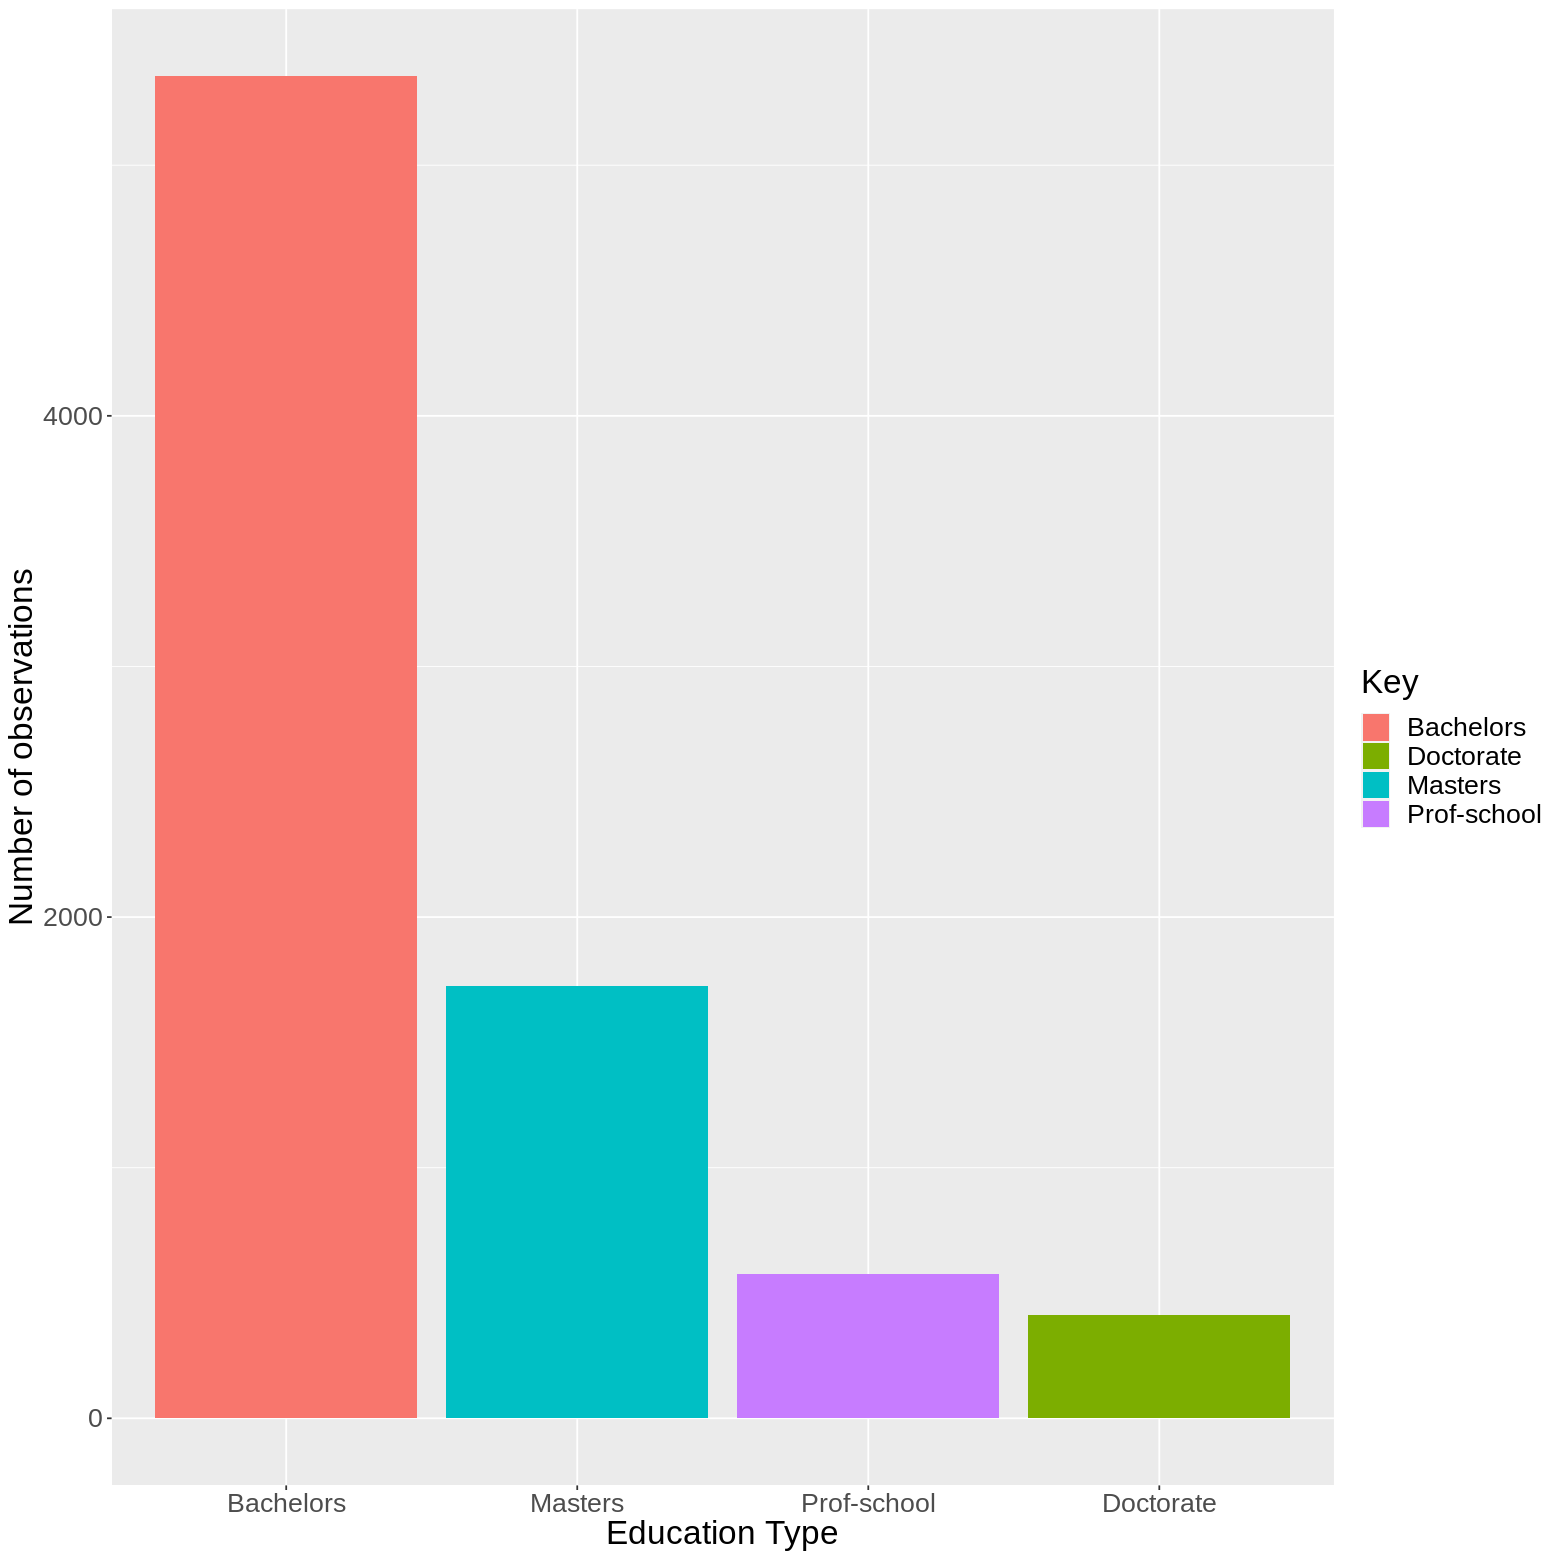

In [81]:
options(repr.plot.width = 13,repr.plot.height = 13)
income_plot_1 <- income_training |>
                group_by(education) |>
                summarize(count = n()) |>
                ggplot(aes(x=reorder(education,-count), y=count,fill=education)) +
                geom_bar(stat = "identity") +
                labs(x="Education Type",y="Number of observations",fill="Key") +
                theme(text=element_text(size = 20))
income_plot_1

The plot clearly supports our prediction of more number of observations for Bachelors and Masters. Hence we can say that our data is a good representation of the real world.

# Education Level based on Base Salary and Bonus

In [ ]:
salary_data_mod_1_base <- salary_data |>
                filter(! is.na(Education)) |>
                mutate(Education = as.factor(Education))

group_by(salary_data_mod_1_base, Education) |>
    summarize(count = n())
# head(salary_data_mod_1_base)

### Dataset distribution
Since we have very few datapoints for
* Highschool
* PhD
* Some College

We will filter out these observations

In [ ]:
salary_data_mod_1_filtered <- salary_data_mod_1_base |>
                                filter(Education %in% list("Bachelor's Degree","Master's Degree")) 
                                # filter(bonus != 0, stockgrantvalue != 0)

group_by(salary_data_mod_1_filtered, Education) |>
    summarize(count = n())

options(repr.plot.width = 15, repr.plot.height= 15)
salary_data_mod_1_plot <- ggplot(salary_data_mod_1_filtered, aes(x=yearsofexperience,y=totalyearlycompensation,color=Education)) +
                                geom_point(alpha=0.4)

head(salary_data_mod_1_filtered)
salary_data_mod_1_plot

In [ ]:
salary_data_mod_2_filtered <- salary_data_mod_1_base |>
                                filter(Education %in% list("Bachelor's Degree","Master's Degree")) |>
                                filter(bonus != 0, stockgrantvalue != 0)

group_by(salary_data_mod_2_filtered, Education) |>
    summarize(count = n())

options(repr.plot.width = 15, repr.plot.height=15)
salary_data_mod_2_plot <- ggplot(salary_data_mod_2_filtered, aes(x=bonus,y=stockgrantvalue,color=Education)) +
                                geom_point(alpha=0.4)

head(salary_data_mod_2_filtered)
salary_data_mod_2_plot